** Objectives **

* Understand nature of the data
* Evaluation Metric ( RMSLE )
* Scope of featur engineering.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import os, sys

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('poster')

import warnings
warnings.filterwarnings('ignore')

basepath = os.path.expanduser('~/Desktop/src/See_Click_Predict/')
sys.path.append(os.path.join(basepath, 'src'))

np.random.seed(1)

** Description. **

* id - a randomly assigned id
* latitude - the lattitude of the issue
* longitude - the longitude of the issue
* summary - a short text title
* description - a longer text explanation
* num_votes - the number of user-generated votes
* num_comments - the number of user-generated comments
* num_views - the number of views
* source - a categorical variable indicating where the issue was created
* created_time - the time the issue originated
* tag_type - a categorical variable (assigned automatically) of the type of issue

In [2]:
train = pd.read_csv(os.path.join(basepath, 'data/raw/train.csv'), parse_dates=['created_time'])
test = pd.read_csv(os.path.join(basepath,  'data/raw/test.csv'), parse_dates=['created_time'])
sample_sub = pd.read_csv(os.path.join(basepath, 'data/raw/sampleSubmission.csv'))

In [3]:
# concatenate the data
data = pd.concat((train, test), axis=0)

In [31]:
train.head(1)

,id,latitude,longitude,summary,description,num_votes,num_comments,num_views,source,created_time,tag_type
0,368683,37.590139,-77.456841,Alleyway light out.,There is a streetlight lamp out in the alleywa...,4,0,62,New Map Widget,2012-01-01 01:20:08,street_light


In [32]:
test.head(1)

,id,latitude,longitude,summary,description,source,created_time,tag_type
0,21523,41.913652,-87.70605,Graffiti Removal,NaN,remote_api_created,2013-05-01 00:13:47,NaN


** Tag Type **

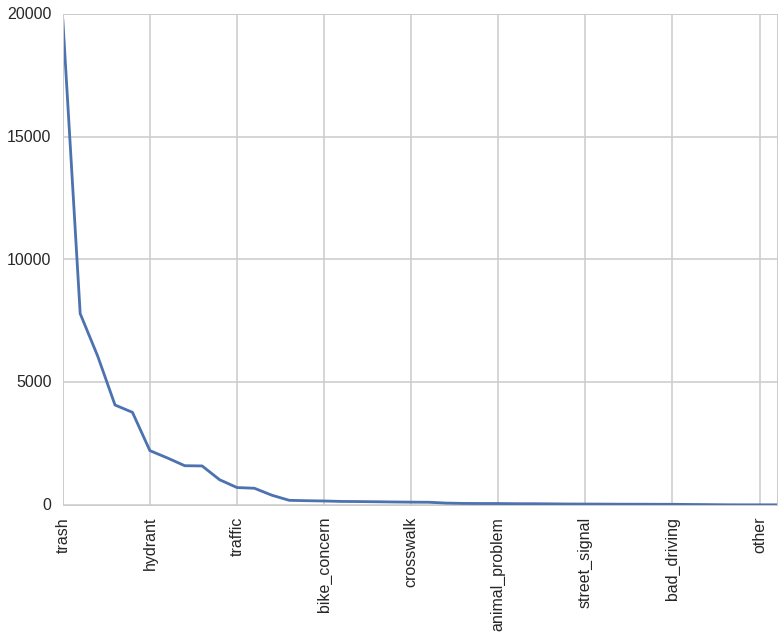

In [15]:
train.tag_type.value_counts().plot()
plt.xticks(rotation=90);

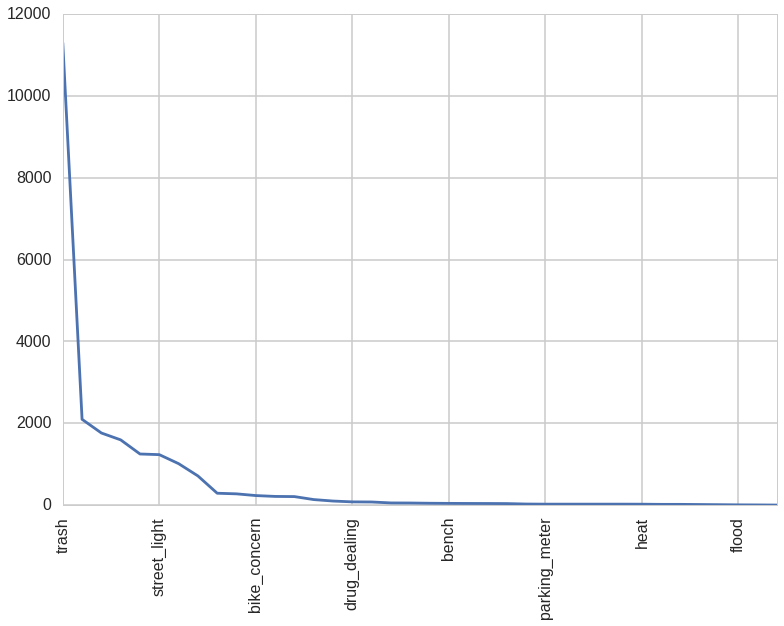

In [16]:
test.tag_type.value_counts().plot()
plt.xticks(rotation=90);

In [18]:
# How many tag types are in training set but not in test set ?
set(train.tag_type.unique()) - set(test.tag_type.unique())

{'abandoned_vehicles',
 'lost_and_found',
 'other',
 'public_art',
 'public_concern'}

In [19]:
# How many tag types are in test set but not in training set ?
set(test.tag_type.unique()) - set(train.tag_type.unique())

{'bus_lane'}

** Source **

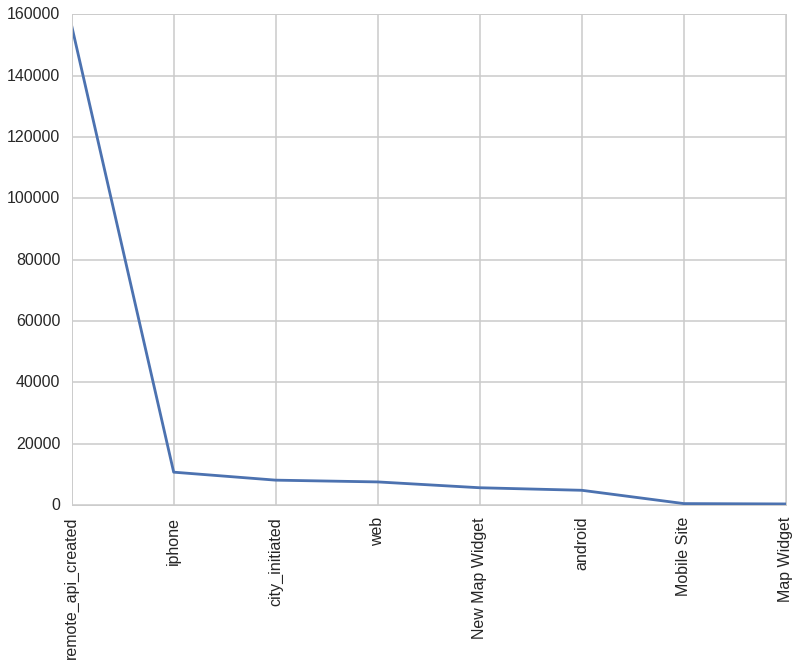

In [20]:
train.source.value_counts().plot()
plt.xticks(rotation=90);

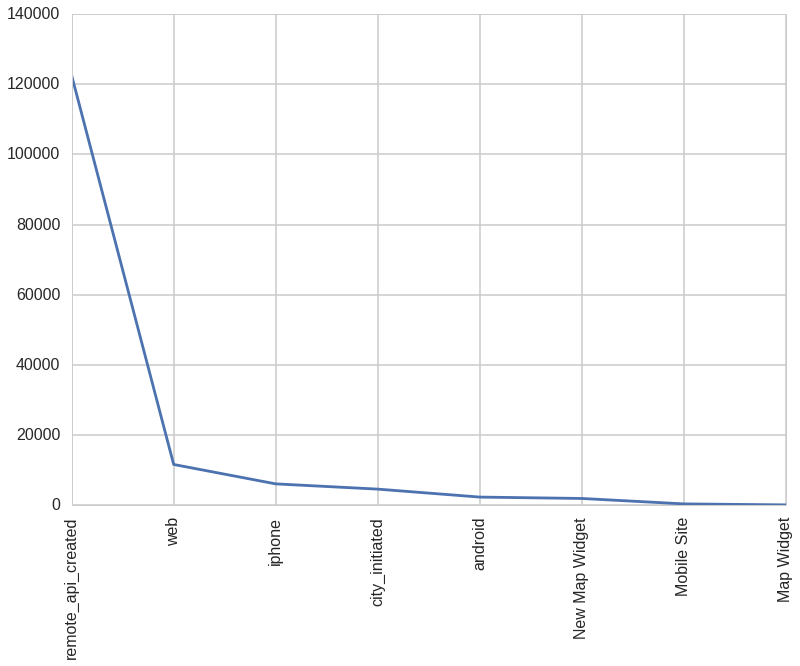

In [21]:
test.source.value_counts().plot()
plt.xticks(rotation=90);

In [22]:
# How many source are in training set but not in test set ?
set(train.source.unique()) - set(test.source.unique())

set()

In [43]:
# How many source are in test set but not in training set ?
set(test.source.unique()) - set(train.source.unique())

set()

** Created Time **

In [39]:
print('Training examples\nMin Date: %s and Max Date: %s'%(train.created_time.min(), train.created_time.max()))
print('\n')
print('Test examples\nMin Date: %s and Max Date: %s'%(test.created_time.min(), test.created_time.max()))

Training examples
Min Date: 2012-01-01 01:20:08 and Max Date: 2013-04-30 23:51:37


Test examples
Min Date: 2013-05-01 00:13:47 and Max Date: 2013-09-17 15:22:12


** There is time component to this data as well. **

In [41]:
train.columns

Index(['id', 'latitude', 'longitude', 'summary', 'description', 'num_votes',
       'num_comments', 'num_views', 'source', 'created_time', 'tag_type'],
      dtype='object')

** Distribution of the target variables. **

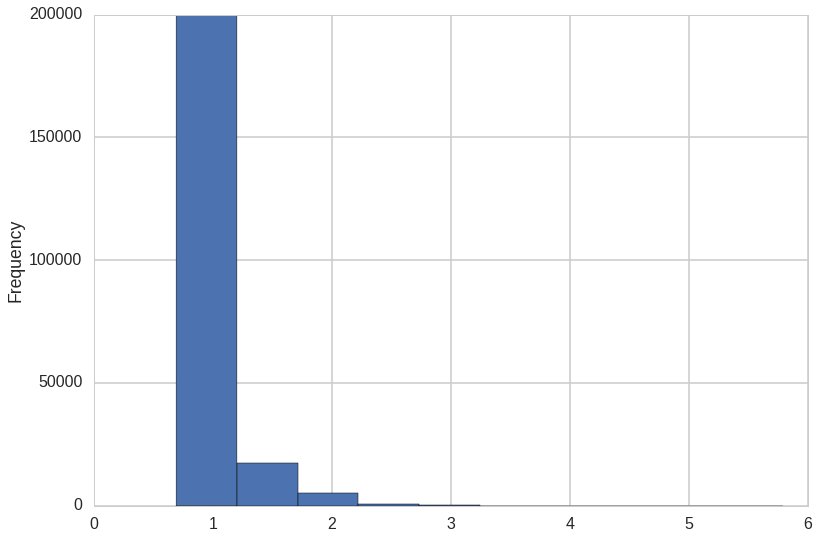

In [45]:
train.num_votes.map(np.log1p).plot.hist();

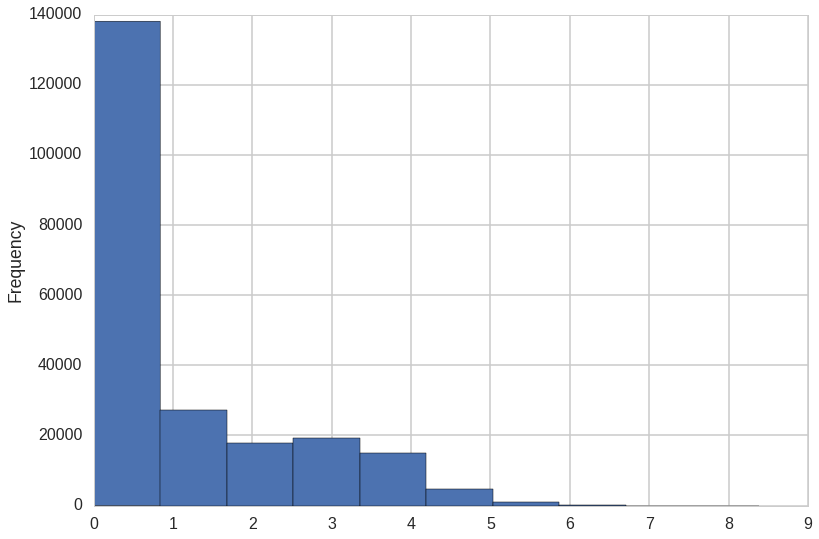

In [47]:
train.num_views.map(np.log1p).plot.hist();

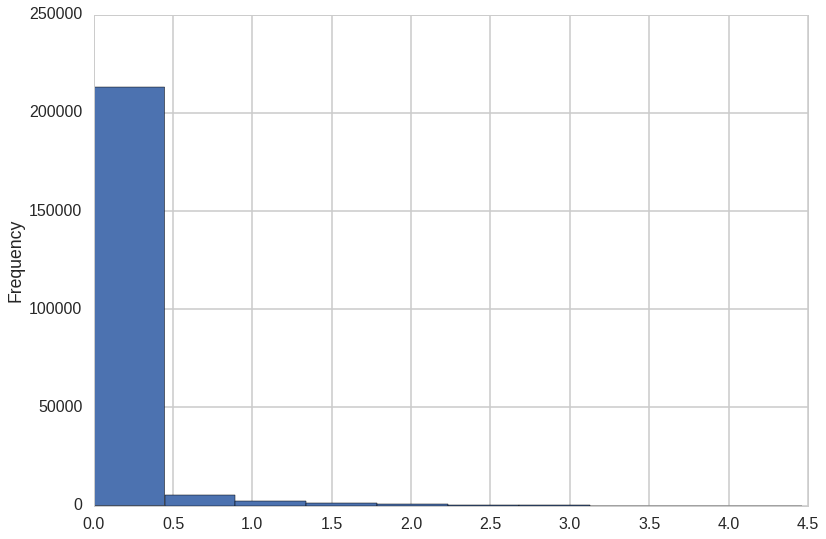

In [48]:
train.num_comments.map(np.log1p).plot.hist();

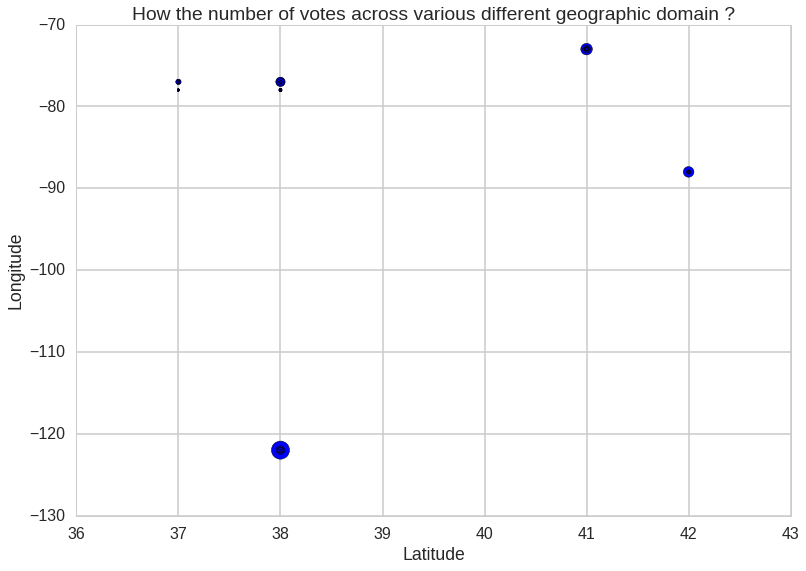

In [53]:
# round off latitude and longitude
lat_round = train.latitude.map(np.round)
long_round = train.longitude.map(np.round)

plt.scatter(lat_round, long_round, s=train.num_votes.fillna(0))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('How the number of votes across various different geographic domain ?');

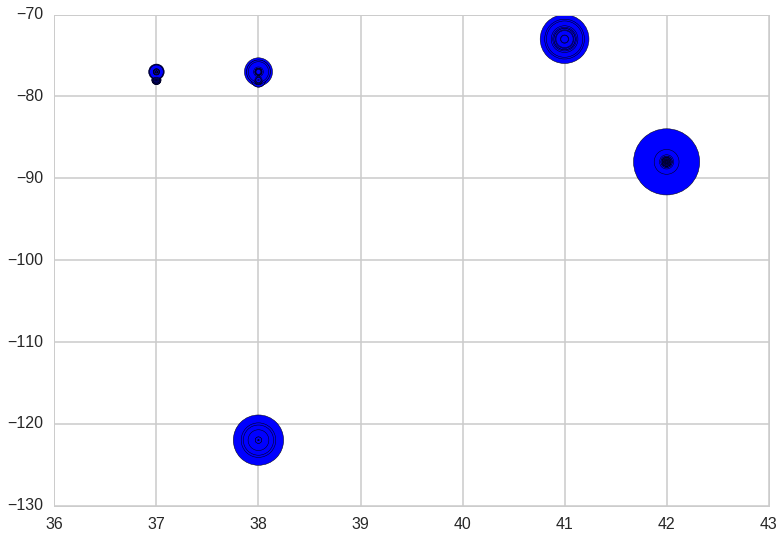

In [51]:
plt.scatter(lat_round, long_round, s=train.num_views.fillna(0))
plt.xlabel()

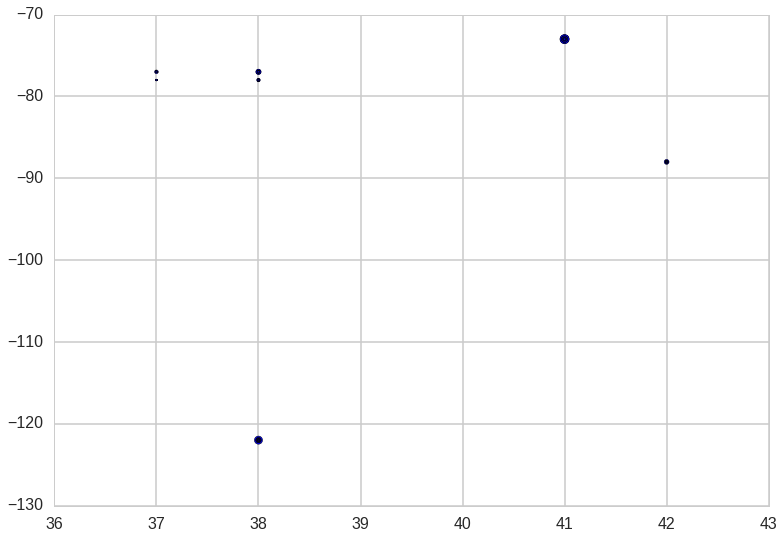

In [52]:
plt.scatter(lat_round, long_round, s=train.num_comments.fillna(0));

** How many NaN values do we have in the training and test examples ? **

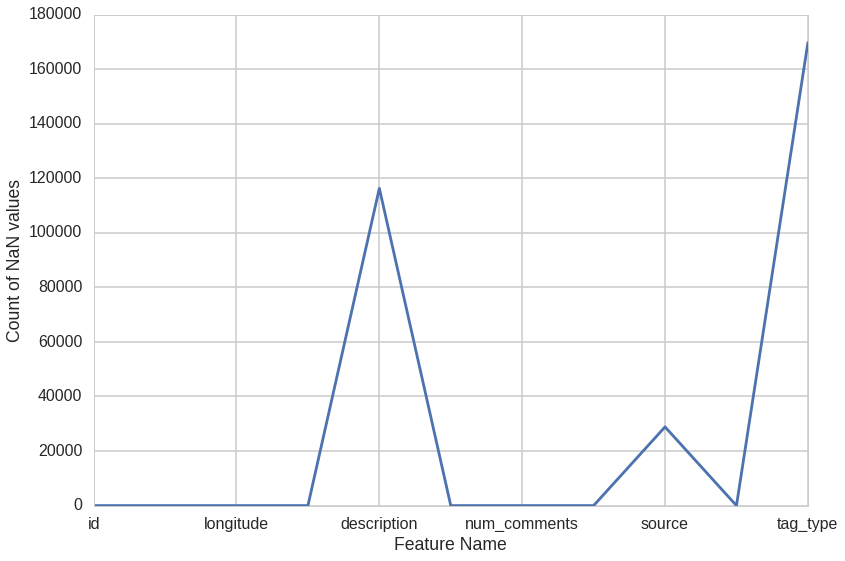

In [60]:
train.isnull().sum(axis=0).plot();
plt.xlabel('Feature Name')
plt.ylabel('Count of NaN values');

In [64]:
train[['num_votes', 'num_comments', 'num_views']].mean(axis=0)

num_votes       1.511063
num_comments    0.100153
num_views       8.813570
dtype: float64

** Target Variables by Source ** 

In [15]:
print("===== num votes by source")
print(train.groupby(["source"])["num_votes"].apply(np.mean))

===== num_votes by source
source
Map Widget            3.685096
Mobile Site           3.685499
New Map Widget        2.642017
android               2.732991
city_initiated        1.961068
iphone                3.196843
remote_api_created    1.009024
web                   3.259845
Name: num_votes, dtype: float64


In [16]:
print("===== num comments by source ")
print(train.groupby(["source"])["num_comments"].mean())

===== num comments by source 
source
Map Widget            1.197115
Mobile Site           0.934087
New Map Widget        0.313016
android               0.334635
city_initiated        0.093781
iphone                0.474559
remote_api_created    0.000454
web                   0.532596
Name: num_comments, dtype: float64


In [17]:
print("===== num views by source ")
print(train.groupby(["source"])["num_views"].mean())

===== num views by source 
source
Map Widget            77.918269
Mobile Site           31.653484
New Map Widget        26.634639
android               28.466393
city_initiated        11.611410
iphone                35.251439
remote_api_created     1.233932
web                   17.695904
Name: num_views, dtype: float64
